# Regression Analysis and Goodness of Fit

Regression analysis is a powerful statistical tool used to model the relationship between a dependent variable and one or more independent variables. In this context, we aim to understand how changes in the independent variables affect the dependent variable. Two common types of regression are simple linear regression and polynomial regression. Simple linear regression models the relationship as a straight line, while polynomial regression can model more complex, curved relationships.

### Goodness of Fit

The goodness of fit of a model indicates how well the model's predictions match the actual data. It is typically evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²).

- **Mean Squared Error (MSE)**: Measures the average squared difference between observed and predicted values. Lower values indicate a better fit.
- **R-squared (R²)**: Represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). Values closer to 1 indicate a better fit.

### Underfitting and Overfitting

- **Underfitting**: Occurs when a model is too simple to capture the underlying pattern of the data. For example, using a simple linear regression model to fit data that has a clear non-linear relationship would likely result in underfitting. This is evident from high MSE and low R² values.

- **Overfitting**: Occurs when a model is too complex and captures the noise in the data rather than the underlying pattern. This usually happens when using a very high-degree polynomial regression on limited data points. Overfitting models perform well on training data but poorly oedictive performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generate synthetic data for regression analysis
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 2 * X + 3*X**2 + 4* X**3 + np.random.randn(100, 1) * 2 # Dependent variable with some noise

In [3]:
# Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)

In [4]:
# Polynomial Regression (degree 2)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

In [5]:
# Polynomial Regression (degree 3 for comparison)

poly_features3 = PolynomialFeatures(degree=3)
X_poly3 = poly_features3.fit_transform(X)

poly_reg3 = LinearRegression()
poly_reg3.fit(X_poly3, y)
y_pred_poly3 = poly_reg3.predict(X_poly3)

In [6]:
# Calculate metrics for comparison
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)


mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)


mse_poly3 = mean_squared_error(y, y_pred_poly3)
r2_poly3 = r2_score(y, y_pred_poly3)

print("Metrics for the models:\n")
print( f'\tLinear MSE: {mse_linear:.2f}\n\tLinear R2: {r2_linear:.2f}\n')
print( f'\tPolynomial (degree 2) MSE: {mse_poly:.2f}\n\tPolynomial R2: {r2_poly:.2f}\n')
print( f'\tPolynomial (degree 3) MSE: {mse_poly3:.2f}\n\tPolynomial R2: {r2_poly3:.2f}\n')



Metrics for the models:

	Linear MSE: 238343.15
	Linear R2: 0.83

	Polynomial (degree 2) MSE: 5659.22
	Polynomial R2: 1.00

	Polynomial (degree 3) MSE: 3.88
	Polynomial R2: 1.00



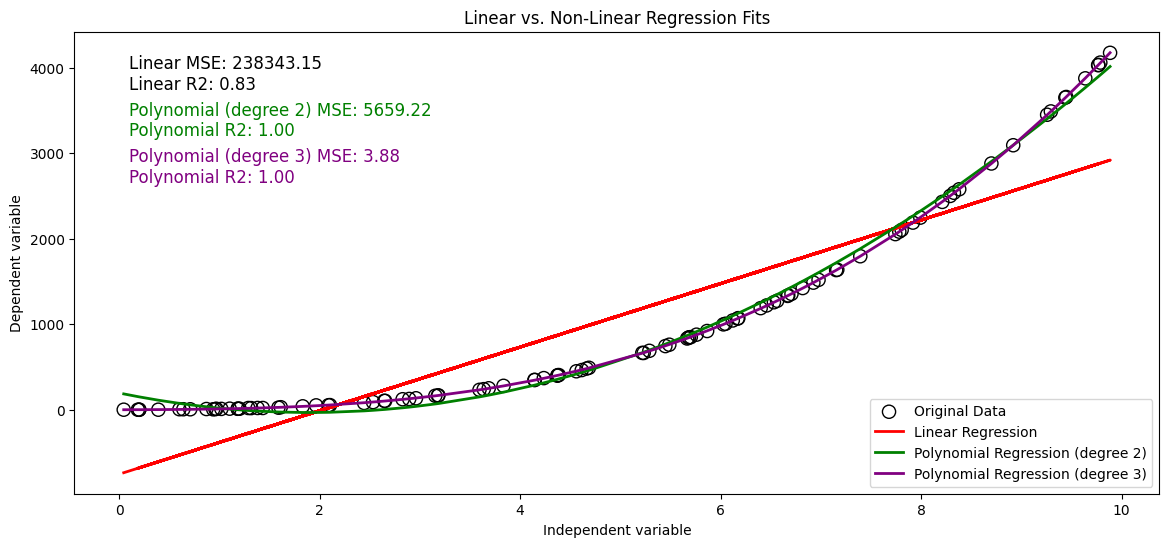

In [7]:
# Plotting the data and regression fits
plt.figure(figsize=(14, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='none',edgecolor='k', label='Original Data',s=90)

# Plot for Simple Linear Regression
plt.plot(X, y_pred_linear, color='red', linewidth=2, label='Linear Regression')

# Plot for Polynomial Regression (degree 2)
X_sorted, y_pred_poly_sorted = zip(*sorted(zip(X, y_pred_poly)))
plt.plot(X_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Polynomial Regression (degree 2)')

# Plot for Polynomial Regression (degree 3)
X_sorted, y_pred_poly3_sorted = zip(*sorted(zip(X, y_pred_poly3)))
plt.plot(X_sorted, y_pred_poly3_sorted, color='purple', linewidth=2, label='Polynomial Regression (degree 3)')

# Titles and labels
plt.title('Linear vs. Non-Linear Regression Fits')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend(loc="lower right")

# Display metrics in the plot
plt.text(0.05, 0.95, f'Linear MSE: {mse_linear:.2f}\nLinear R2: {r2_linear:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Polynomial (degree 2) MSE: {mse_poly:.2f}\nPolynomial R2: {r2_poly:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='green')
plt.text(0.05, 0.75, f'Polynomial (degree 3) MSE: {mse_poly3:.2f}\nPolynomial R2: {r2_poly3:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='purple')

plt.show()


## Conclusion

In our analysis, we compared simple linear regression, polynomial regression (degree 2), and polynomial regression (degree 3) on a dataset generated with a cubic relationship. The results showed that the linear regression model had higher MSE and lower R² values, indicating underfitting. The polynomial regression models (degrees 2 and 3) had lower MSE and higher R² values, with the degree 3 model fitting the data best. However, it's crucial to balance model complexity to avoid overfitting and ensure that the model generalizes well to new, unseen data.

This analysis demonstrates the importance of selecting the appropriate model complexity to achieve an optimal balance between underfitting and overfitting, ensuring good predictive performance.